## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import descartes
import sweetviz as sv

%matplotlib inline

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


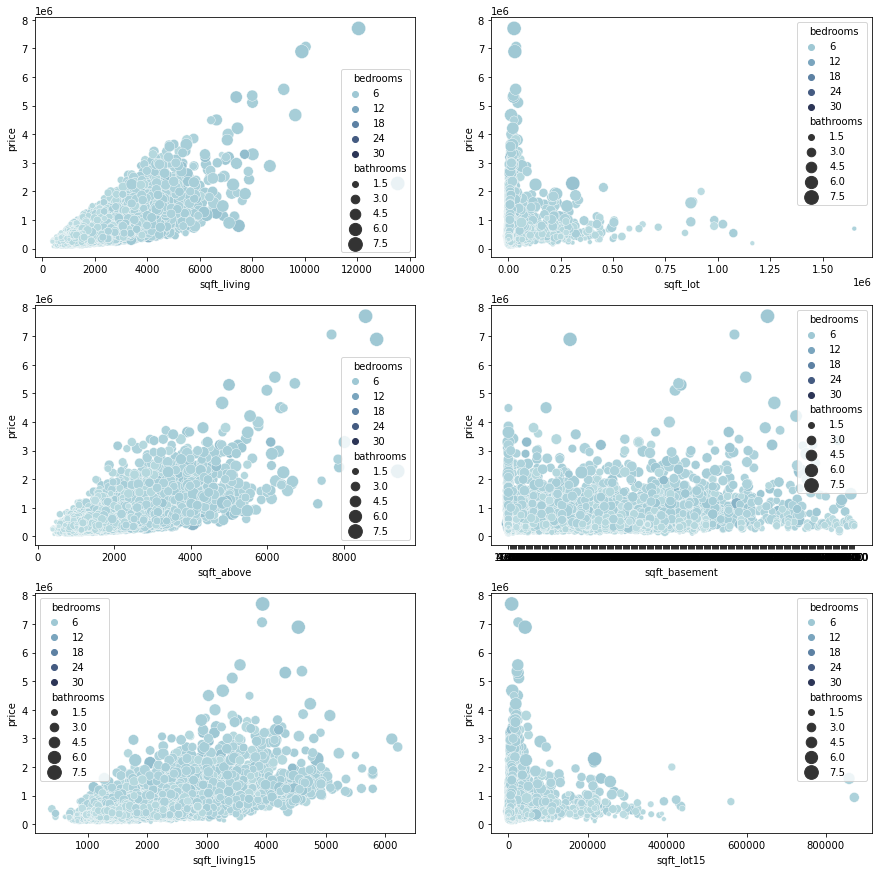

In [6]:
#set visual and style aspects
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)


ax1 = sns.scatterplot(x="sqft_living", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,0]);
ax1.set_xlabel("sqft_living")

sns.scatterplot(x="sqft_lot", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,1]);

sns.scatterplot(x="sqft_above", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,0]);

sns.scatterplot(x="sqft_basement", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,1]);

sns.scatterplot(x="sqft_living15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,0]);

sns.scatterplot(x="sqft_lot15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,1]);

In [89]:
my_report = sv.analyze(df,'price')
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
df = df[df['yr_renovated'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     15809 non-null  object 
 9   view           17704 non-null  object 
 10  condition      17755 non-null  object 
 11  grade          17755 non-null  object 
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

In [9]:
df = df[df.yr_renovated != 0.00]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             744 non-null    int64  
 1   date           744 non-null    object 
 2   price          744 non-null    float64
 3   bedrooms       744 non-null    int64  
 4   bathrooms      744 non-null    float64
 5   sqft_living    744 non-null    int64  
 6   sqft_lot       744 non-null    int64  
 7   floors         744 non-null    float64
 8   waterfront     652 non-null    object 
 9   view           743 non-null    object 
 10  condition      744 non-null    object 
 11  grade          744 non-null    object 
 12  sqft_above     744 non-null    int64  
 13  sqft_basement  744 non-null    object 
 14  yr_built       744 non-null    int64  
 15  yr_renovated   744 non-null    float64
 16  zipcode        744 non-null    int64  
 17  lat            744 non-null    float64
 18  long    

In [11]:
df.drop(['sqft_lot', 'floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,yr_renovated,zipcode
1,6414100192,12/9/2014,538000.0,3,2.25,2570,Average,1951,1991.0,98125
35,9547205180,6/13/2014,696000.0,3,2.50,2300,Average,1930,2002.0,98115
95,1483300570,9/8/2014,905000.0,4,2.50,3300,Average,1946,1991.0,98040
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,Average,1950,2010.0,98004
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,Average,1914,1992.0,98004


<BarContainer object of 744 artists>

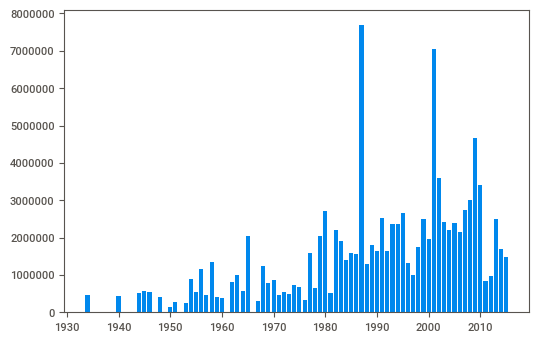

In [13]:
fig,ax = plt.subplots()
ax.bar(df['yr_renovated'], df['price'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            744 non-null    int64  
 1   date          744 non-null    object 
 2   price         744 non-null    float64
 3   bedrooms      744 non-null    int64  
 4   bathrooms     744 non-null    float64
 5   sqft_living   744 non-null    int64  
 6   condition     744 non-null    object 
 7   yr_built      744 non-null    int64  
 8   yr_renovated  744 non-null    float64
 9   zipcode       744 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 63.9+ KB


In [15]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [17]:
df_kc.drop(['date', 'view', 'waterfront','yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)

In [18]:
df_kc=df_kc[df_kc['bedrooms']<=5]

In [19]:
df_kc=df_kc[df_kc['bathrooms']<=4]

In [20]:
df_kc['price'].sort_values(ascending=False)[:50]

id
3835500195    4490000.0
7397300170    3710000.0
4389201095    3650000.0
2425049063    3640000.0
4114601570    3600000.0
3126059023    3400000.0
1118000320    3400000.0
9808100150    3350000.0
3625059152    3300000.0
7524900003    3280000.0
8964800890    3200000.0
251500080     3200000.0
624069108     3200000.0
3025059124    3170000.0
333100295     3120000.0
4131900066    3100000.0
3760500116    3070000.0
1732800780    3070000.0
1925059254    3000000.0
8964800330    3000000.0
1118000340    3000000.0
518500480     3000000.0
9808100100    3000000.0
3625049014    2950000.0
6613000930    2950000.0
6447300365    2900000.0
7159200040    2900000.0
2624049091    2900000.0
7960900060    2900000.0
1118000301    2890000.0
2303900090    2880000.0
6065300840    2850000.0
1069000070    2800000.0
3859900060    2750000.0
7397300220    2750000.0
624069035     2750000.0
2525049086    2720000.0
8043700300    2700000.0
5442300807    2700000.0
2524069078    2700000.0
625059036     2700000.0
2525049263   

In [21]:
df_kc['grade']=df_kc.grade.str.split(expand=True)

In [22]:
df_kc['grade']=df_kc['grade'].astype(int)

In [23]:
x_columns = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2

<ipython-input-23-e2a9976bb9cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


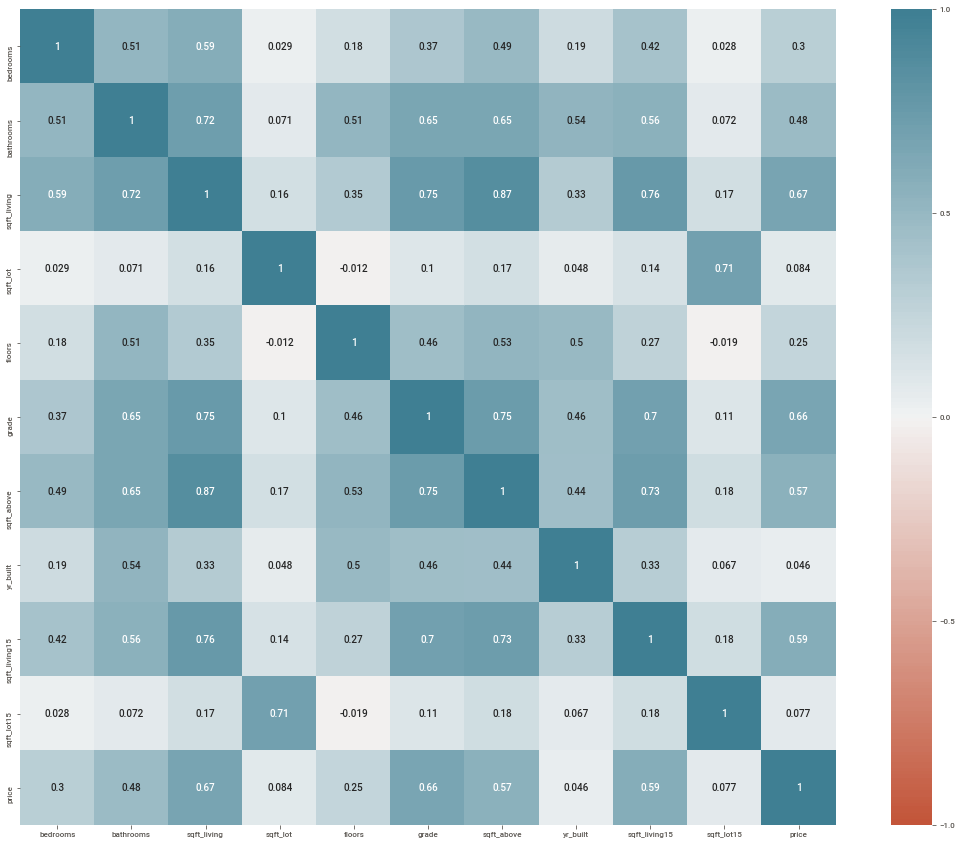

In [24]:
corr = df_kc.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True,
xticklabels = corr.columns.values,
yticklabels = corr.columns.values,
vmin = -1,
vmax = 1,
center = 0,
cmap = sns.diverging_palette(20, 220, n = 200),
square = True)
sns.set(font_scale=5)
plt.show()

In [25]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [26]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [27]:
MC_df

,Correlations,Features
3,0.866220,"[sqft_living, sqft_above]"
9,0.866220,"[sqft_above, sqft_living]"
4,0.763473,"[sqft_living, sqft_living15]"
12,0.763473,"[sqft_living15, sqft_living]"
2,0.754325,"[sqft_living, grade]"
6,0.754325,"[grade, sqft_living]"
7,0.745109,"[grade, sqft_above]"
10,0.745109,"[sqft_above, grade]"
11,0.733418,"[sqft_above, sqft_living15]"
14,0.733418,"[sqft_living15, sqft_above]"


### Question 2

In [77]:
# Variables we could use

price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']

price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])

In [78]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=85, fontname='arial')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='arial')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='arial')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='arial')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='arial')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='arial')
    plt.tight_layout;
    plt.show;

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

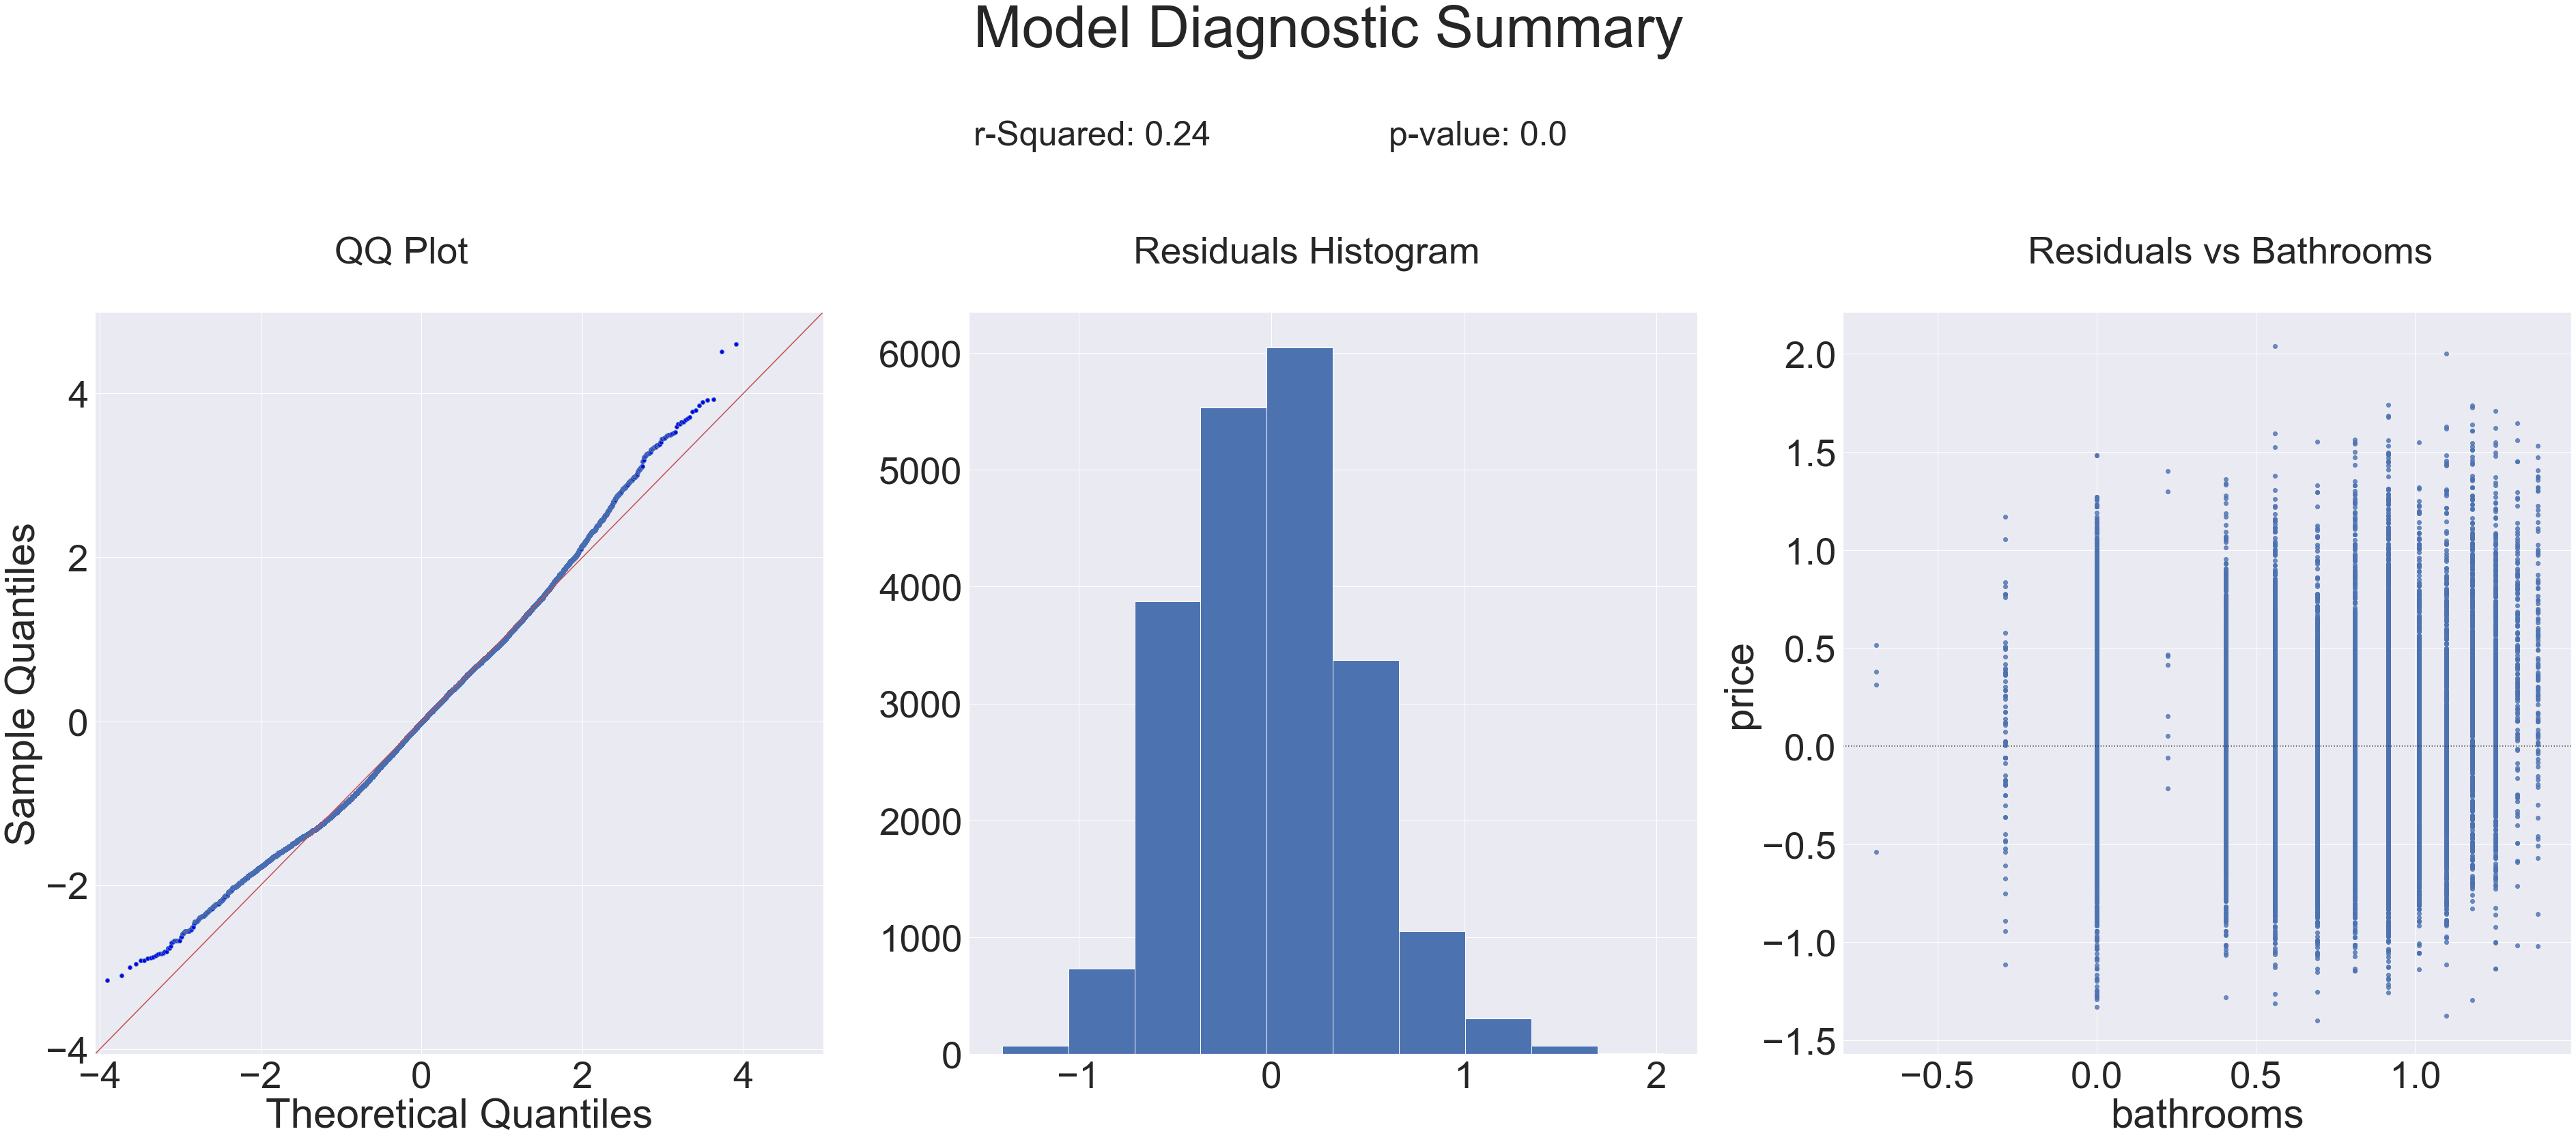

In [87]:
f = "price_log ~ bath_log"
bath_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(bath_model, bath_log, 'Bathrooms', price_log)

In [88]:
bath_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6785.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:36:53   Log-Likelihood:                -12751.
No. Observations:               21061   AIC:                         2.551e+04
Df Residuals:                   21059   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5941      0.006   2058.280      0.000      12.582      12.606
bath_log       0.6588      0.008     82.371      0.000       0.643       0.674
==============================================================================
Omnibus:                      270.227   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.424
Skew:                           0.281   Prob(JB):                     1.28e-61
Kurtosis:                       3.064   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

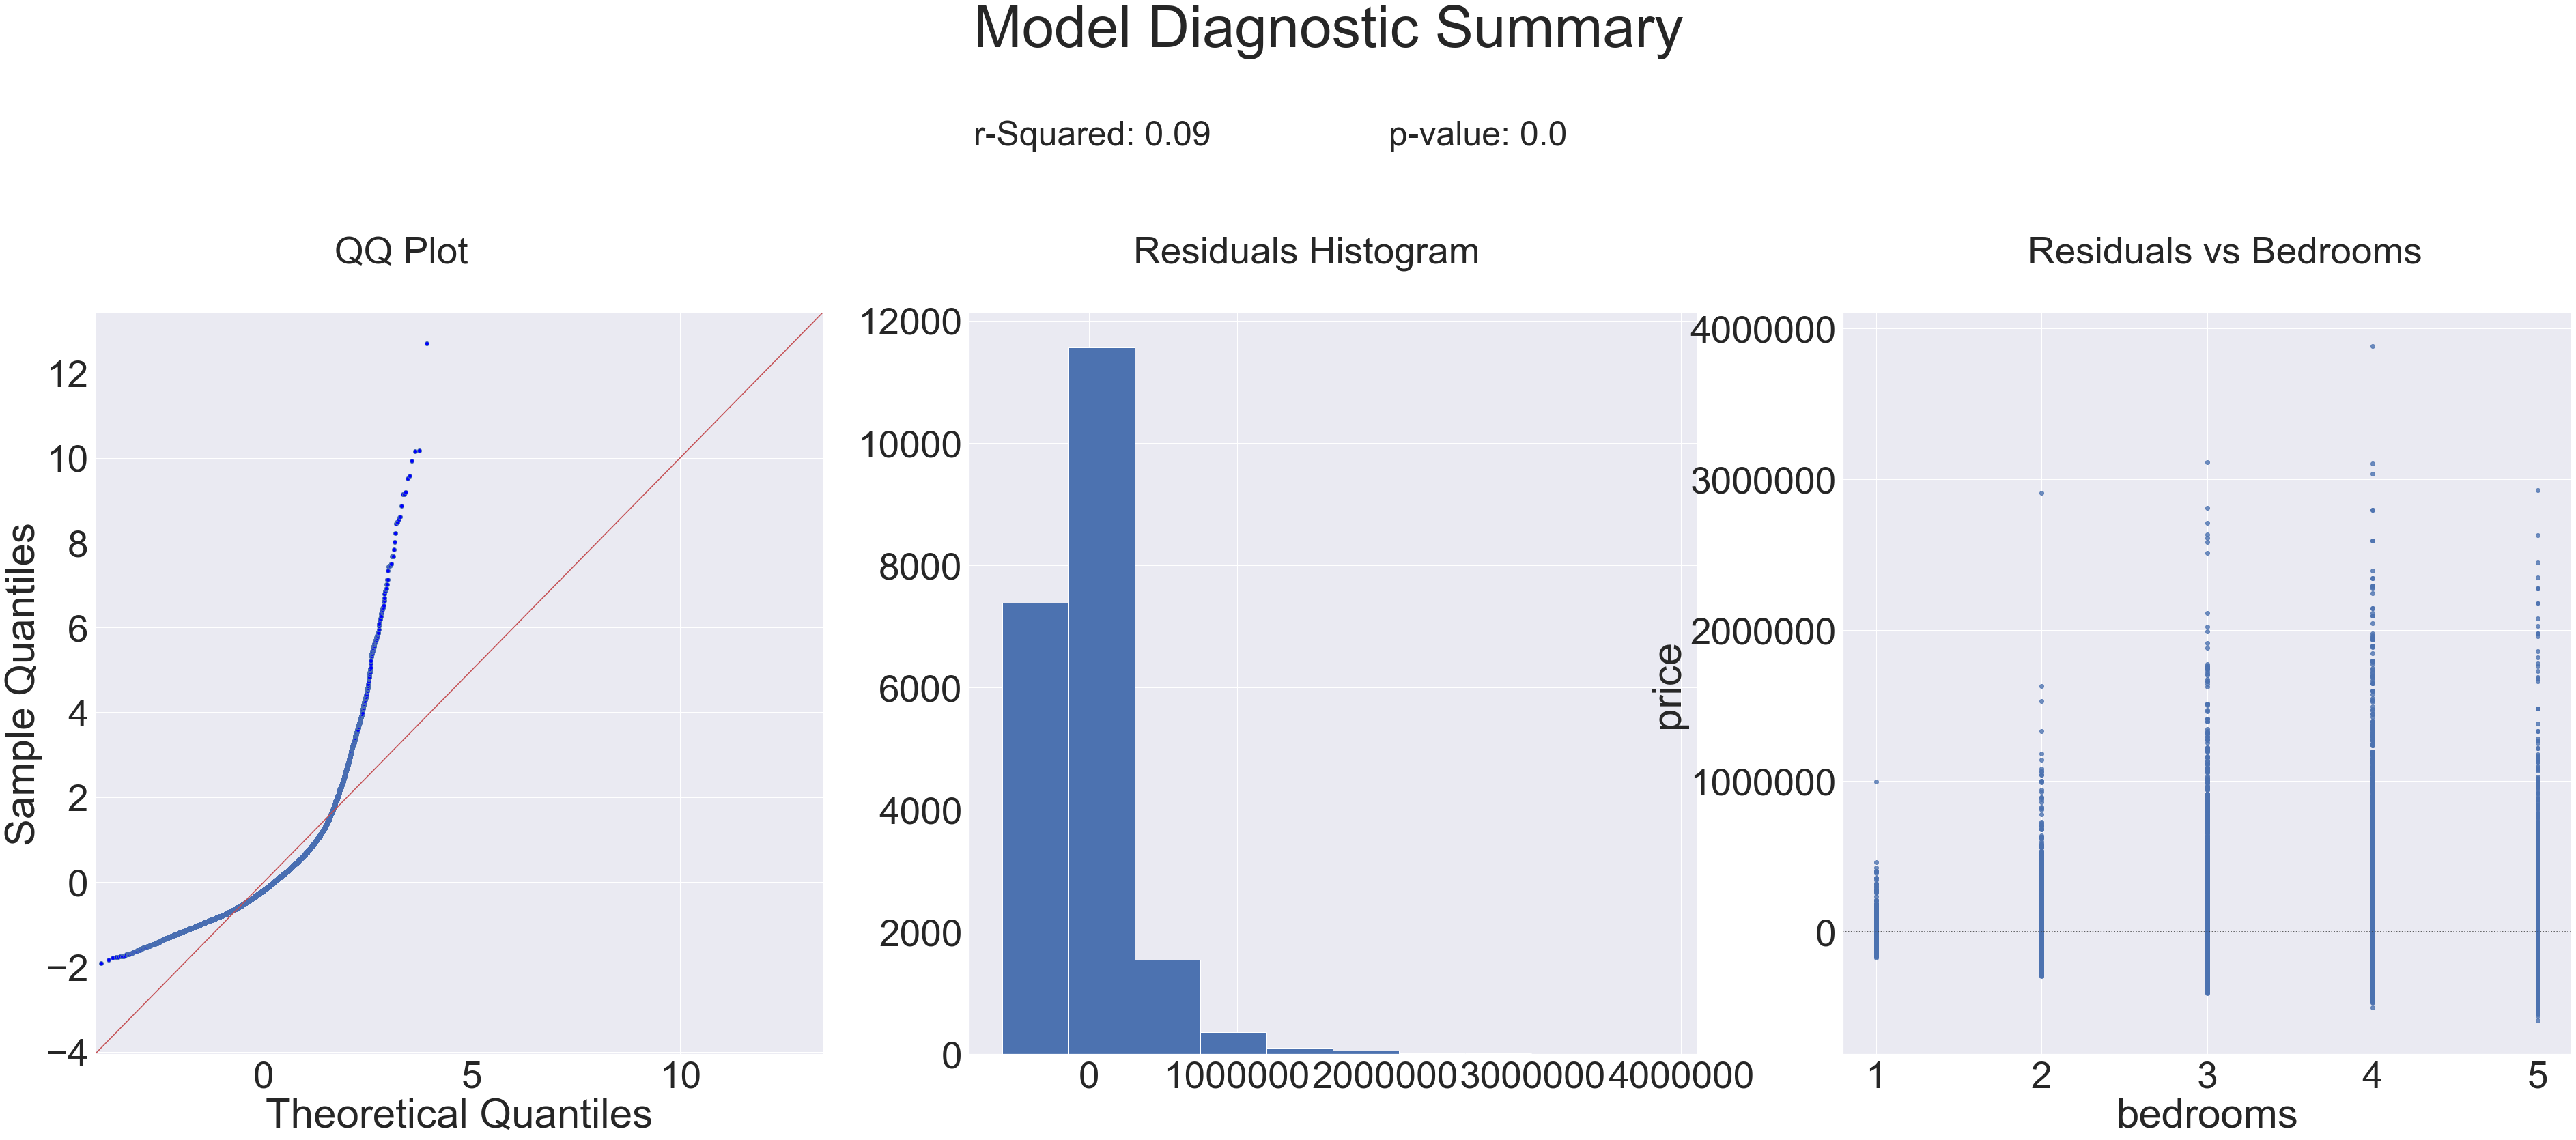

In [83]:
f = "price ~ bed"
bed_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(bed_model, bed, 'Bedrooms', price)

In [74]:
bed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2080.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:31:30   Log-Likelihood:            -2.9591e+05
No. Observations:               21061   AIC:                         5.918e+05
Df Residuals:                   21059   BIC:                         5.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.364e+05   8753.739     15.584      0.000    1.19e+05    1.54e+05
bedrooms    1.169e+05   2562.528     45.604      0.000    1.12e+05    1.22e+05
==============================================================================
Omnibus:                    13313.911   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217795.026
Skew:                           2.787   Prob(JB):                         0.00
Kurtosis:                      17.735   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""